In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

In [2]:
#to load data set
df=pd.read_csv("kaggle_diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1


In [3]:
#to check null value
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

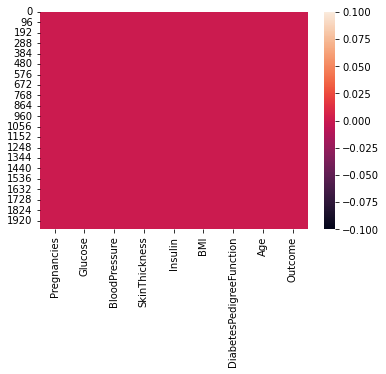

In [4]:
#by visualization null values
sb.heatmap(df.isnull())
plt.show()

In [5]:
#to check how many rows and columns are there in this dataset
df.shape

(2000, 9)

In [6]:
#target variable how many 0's and 1's is there.
df['Outcome'].value_counts()

0    1316
1     684
Name: Outcome, dtype: int64

In [7]:
#Clearly seen the data is balanced.

In [8]:
#to check duplicated row
df.duplicated().sum()

1256

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
#to check duplicated row
df.duplicated().sum()

0

In [11]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [12]:
#select input and output
X=df.drop('Outcome',axis=1)#input
Y=df['Outcome']#output

In [13]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [14]:
#apply standard scaler on X_train and X_test
from sklearn.preprocessing import StandardScaler
#create object for StandardScaler class
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [15]:
X_train.shape,Y_train.shape

((520, 8), (520,))

In [16]:
X_test.shape,Y_test.shape

((224, 8), (224,))

In [17]:
#create a  user defined function
def create_model(model):#user defined fuction
    #model user defined object which hold the object of algorithm
    #first train the model with 70% data
    model.fit(X_train,Y_train)
    #then test the model with 30% data
    Y_pred=model.predict(X_test)
    #generate report
    print(classification_report(Y_test,Y_pred))
    print(confusion_matrix(Y_test,Y_pred))
    return model

In [18]:
#call the class
from sklearn.metrics import classification_report, confusion_matrix

In [19]:
#1.Apply Logistic Regression
from sklearn.linear_model import LogisticRegression

In [20]:
#create the object of   LogisticRegression class
lr=LogisticRegression(random_state=1)

In [21]:
#call function 
lr=create_model(lr)

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       154
           1       0.68      0.60      0.64        70

    accuracy                           0.79       224
   macro avg       0.75      0.74      0.74       224
weighted avg       0.78      0.79      0.78       224

[[134  20]
 [ 28  42]]


### Here recall score in LogisticRegression is 60% good,but we can do more better.

In [22]:
#2)Now,give data in the next classification algo. DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

In [23]:
#create the object DecisionTreeClassifier class with gini index
dt=DecisionTreeClassifier(random_state=1)#by default gini index
#if not mention

In [24]:
#call function
dt=create_model(dt)

              precision    recall  f1-score   support

           0       0.76      0.68      0.72       154
           1       0.42      0.51      0.46        70

    accuracy                           0.63       224
   macro avg       0.59      0.60      0.59       224
weighted avg       0.65      0.63      0.64       224

[[105  49]
 [ 34  36]]


In [25]:
#CHECK INFORMATION GAIN :
dict={'input':X.columns,'Ig':dt.feature_importances_}
df1=pd.DataFrame(dict)
#sorting in descendig value
df1.sort_values('Ig',ascending=False,ignore_index=True)

,input,Ig
0,Glucose,0.302360
1,BMI,0.166217
2,DiabetesPedigreeFunction,0.165793
3,Age,0.142351
4,BloodPressure,0.077491
5,Pregnancies,0.069794
6,SkinThickness,0.045129
7,Insulin,0.030865


In [26]:
#But we got less score 0.51 % its good but not excellent , 
#region behind less score , overfit means 
#model is overfit so reduced the overfitting situation : - 
#then we use pruning technique 

#How to reduced a overfitting situation By using the Pruning technique : -
#There are 2 types of pruning technique : -
#1. max_depth : inbulit parameter of DecisionTreeClassifier class
#2. min_samples_leaf  : inbuilt parameter of DecisionTreeClassifier class

In [27]:
#Pruning Technique : max_depth  : the value of max_depth cannot more than
#8  (means <=8) 
#create object of DecisionTreeClassifier class with gini index and 
#use parameter max_depth (to remove overfitting)
"""
for i in range(1,9): #start=1 stop=9-1=8 step=+1
    dt1=DecisionTreeClassifier(random_state=1,max_depth=i) #bydefault gini
    print("max depth : ",i)
    #call function 
    dt1=create_model(dt1)
"""   
dt1=DecisionTreeClassifier(random_state=1,max_depth=4) #bydefault gini
#call function 
dt1=create_model(dt1)

              precision    recall  f1-score   support

           0       0.88      0.68      0.76       154
           1       0.53      0.80      0.64        70

    accuracy                           0.71       224
   macro avg       0.70      0.74      0.70       224
weighted avg       0.77      0.71      0.72       224

[[104  50]
 [ 14  56]]


In [28]:
#CHECK INFORMATION GAIN :
dict={'input':X.columns,'Ig':dt1.feature_importances_}
df1=pd.DataFrame(dict)
#sorting in descendig value
df1.sort_values('Ig',ascending=False,ignore_index=True)

,input,Ig
0,Glucose,0.565596
1,BMI,0.209823
2,Age,0.140294
3,DiabetesPedigreeFunction,0.064486
4,Insulin,0.019802
5,Pregnancies,0.000000
6,BloodPressure,0.000000
7,SkinThickness,0.000000


In [29]:
#2.min_samples_leaf:inbuilt paramater of DecisionTreeClassifier class
#leaf means no child:
#min_samples_leaf >=45 and<=100

In [30]:
#use 2nd pruning technique: min_samples_leaf inbult parameter of 
#DecisionTreeClasifier class:it is also used to remove overfitting
#leaf mns no child:
#create  object of DecisionTreeClasifier class
"""
for i in range(45,101,1): #i=45 i=47,.....
    dt2=DecisionTreeClassifier(random_state=1,min_samples_leaf=i)
    #by default gini index
    print('min_samples_leaf :',i)
    #call function
    dt2=create_model(dt2)
"""
dt2=DecisionTreeClassifier(random_state=1,min_samples_leaf=46)
    #by default gini index
print('min_samples_leaf :',46)
    #call function
dt2=create_model(dt2)

min_samples_leaf : 46
              precision    recall  f1-score   support

           0       0.85      0.78      0.81       154
           1       0.59      0.69      0.63        70

    accuracy                           0.75       224
   macro avg       0.72      0.73      0.72       224
weighted avg       0.76      0.75      0.75       224

[[120  34]
 [ 22  48]]


### Here recall score: 0.80 mns 80% (DTC with gini index)

In [31]:
#DecisionTreeClassifier with Entropy method
#frst ceate an object of DecisionTreeClassifier class
dt_entropy=DecisionTreeClassifier(random_state=1,criterion='entropy')
#by default criterion='gini' if not given
#formula: P*log(P)-Q*log(Q)


In [32]:
#call function
dt_entropy=create_model(dt_entropy)

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       154
           1       0.58      0.54      0.56        70

    accuracy                           0.74       224
   macro avg       0.69      0.68      0.69       224
weighted avg       0.73      0.74      0.73       224

[[127  27]
 [ 32  38]]


In [33]:
#Pruning Technique : max_depth  : the value of max_depth cannot more than
#8  (means <=8) 
#create object of DecisionTreeClassifier class with entropy index and 
#use parameter max_depth (to remove overfitting)
"""

for i in range(1,9): #start=1 stop=9-1=8 step=+1
    dt_entropy=DecisionTreeClassifier(random_state=1,criterion='entropy',max_depth=i) #bydefault gini
    print("max depth : ",i)
    #call function 
    dt_entropy=create_model(dt_entropy)
"""
dt_entropy=DecisionTreeClassifier(random_state=1,criterion='entropy',max_depth=4) #bydefault gini
print("max depth : ",4)
    #call function 
dt_entropy=create_model(dt_entropy)

max depth :  4
              precision    recall  f1-score   support

           0       0.88      0.69      0.78       154
           1       0.54      0.79      0.64        70

    accuracy                           0.72       224
   macro avg       0.71      0.74      0.71       224
weighted avg       0.77      0.72      0.73       224

[[107  47]
 [ 15  55]]


In [34]:
#CHECK INFORMATION GAIN :
dict={'input':X.columns,'Ig':dt_entropy.feature_importances_}
df1=pd.DataFrame(dict)
#sorting in descendig value
df1.sort_values('Ig',ascending=False,ignore_index=True)

,input,Ig
0,Glucose,0.515251
1,BMI,0.261316
2,Age,0.092256
3,Insulin,0.044242
4,DiabetesPedigreeFunction,0.031642
5,SkinThickness,0.031006
6,Pregnancies,0.024288
7,BloodPressure,0.000000


In [35]:
#2.min_samples_leaf:inbuilt paramater of DecisionTreeClassifier class
#leaf means no child:
#min_samples_leaf >=45 and<=100

In [36]:
#use 2nd pruning technique: mi_samples_leaf inbult parameter of 
#DecisionTreeClasifier class:it is also used to remove overfitting
#leaf mns no child:
#create  object of DecisionTreeClasifier class
"""
for i in range(45,101,1): #i=45 i=47,.....
    dt_entropy2=DecisionTreeClassifier(random_state=1,criterion='entropy',min_samples_leaf=i)
    #by default gini index
    print('min_samples_leaf :',i)
    #call function
    dt_entropy2=create_model(dt_entropy2)
"""
dt_entropy2=DecisionTreeClassifier(random_state=1,criterion='entropy',min_samples_leaf=61)
    #by default gini index
print('min_samples_leaf :',61)
    #call function
dt_entropy2=create_model(dt_entropy2)

min_samples_leaf : 61
              precision    recall  f1-score   support

           0       0.89      0.69      0.78       154
           1       0.55      0.81      0.66        70

    accuracy                           0.73       224
   macro avg       0.72      0.75      0.72       224
weighted avg       0.78      0.73      0.74       224

[[107  47]
 [ 13  57]]


In [37]:
#CHECK INFORMATION GAIN :
dict={'input':X.columns,'Ig':dt_entropy2.feature_importances_}
df1=pd.DataFrame(dict)
#sorting in descendig value
df1.sort_values('Ig',ascending=False,ignore_index=True)

,input,Ig
0,Glucose,0.623470
1,BMI,0.256600
2,Age,0.119931
3,Pregnancies,0.000000
4,BloodPressure,0.000000
5,SkinThickness,0.000000
6,Insulin,0.000000
7,DiabetesPedigreeFunction,0.000000


### Here recall score 81% (DTC with entropy) : in this dataset dtc with entropy is good as compared to gini index.

In [38]:
#Apply Ensembling Technique : -
#There are different types of Ensembling technique
'''
1. Naive Aggregation 
a. Hard Voting      b. Soft voting

2. Bootstrapping
a. Bagging   b. pasting   c.Random Forest Tree

3. Boosting Technique
a. ADA Boost (Adaptor Boosting)  b. Gradient Boosting  c. Extreme Gradient Boosting(XG Boost)

4. Stacking
'''

'\n1. Naive Aggregation \na. Hard Voting      b. Soft voting\n\n2. Bootstrapping\na. Bagging   b. pasting   c.Random Forest Tree\n\n3. Boosting Technique\na. ADA Boost (Adaptor Boosting)  b. Gradient Boosting  c. Extreme Gradient Boosting(XG Boost)\n\n4. Stacking\n'

In [39]:
#apply random forest tree : it is bootstraping ensembling technique
#it is work with bagging classifier bootstaping  ensembling technique
#in random forest tree:train the dataset on multiple decision tree algo

In [40]:
from sklearn.ensemble import RandomForestClassifier
#ensemble means to train given dataset on multiple algorithms

In [41]:
#create the object for  RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=10,random_state=1)
#here n_estimators means take how many no. of decisiontree

In [42]:
#call function 
rfc=create_model(rfc)

              precision    recall  f1-score   support

           0       0.82      0.85      0.84       154
           1       0.65      0.60      0.62        70

    accuracy                           0.77       224
   macro avg       0.74      0.73      0.73       224
weighted avg       0.77      0.77      0.77       224

[[131  23]
 [ 28  42]]


In [43]:
""""
for i in range(10,101):
    rfc=RandomForestClassifier(n_estimators=i,random_state=1)
    print('No. of decision tree', i)
    rfc=create_model(rfc)
"""

'"\nfor i in range(10,101):\n    rfc=RandomForestClassifier(n_estimators=i,random_state=1)\n    print(\'No. of decision tree\', i)\n    rfc=create_model(rfc)\n'

In [44]:
rfc=RandomForestClassifier(n_estimators=23,random_state=1)
rfc=create_model(rfc)

              precision    recall  f1-score   support

           0       0.86      0.84      0.85       154
           1       0.67      0.69      0.68        70

    accuracy                           0.79       224
   macro avg       0.76      0.76      0.76       224
weighted avg       0.80      0.79      0.80       224

[[130  24]
 [ 22  48]]


In [45]:
dict={'Input':X.columns,'IG':rfc.feature_importances_}
df1=pd.DataFrame(dict)
df1.sort_values('IG',ascending=False)

,Input,IG
1,Glucose,0.232425
5,BMI,0.154675
6,DiabetesPedigreeFunction,0.150074
7,Age,0.142422
2,BloodPressure,0.092400
3,SkinThickness,0.079166
4,Insulin,0.075524
0,Pregnancies,0.073313


In [46]:
#apply purning tech max_depth
""""
for i in range (1,9):
    rfc1=RandomForestClassifier(n_estimators=11,random_state=1,max_depth=i)
    print('print max depth', i)
    rfc1=create_model(rfc1)
"""

'"\nfor i in range (1,9):\n    rfc1=RandomForestClassifier(n_estimators=11,random_state=1,max_depth=i)\n    print(\'print max depth\', i)\n    rfc1=create_model(rfc1)\n'

In [47]:
#apply purning tech max_depth 
rfc1=RandomForestClassifier(n_estimators=11,random_state=1,max_depth=4)
rfc1=create_model(rfc1)

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       154
           1       0.65      0.64      0.65        70

    accuracy                           0.78       224
   macro avg       0.75      0.74      0.74       224
weighted avg       0.78      0.78      0.78       224

[[130  24]
 [ 25  45]]


In [48]:
dict={'Input':X.columns,'IG':rfc1.feature_importances_}
df2=pd.DataFrame(dict)
df2.sort_values('IG',ascending=False)

,Input,IG
1,Glucose,0.412804
7,Age,0.162195
5,BMI,0.143654
6,DiabetesPedigreeFunction,0.113624
4,Insulin,0.049561
3,SkinThickness,0.047807
0,Pregnancies,0.043812
2,BloodPressure,0.026542


### Here recall score in randomforestclassifier is 64% good,but we can do more better.

In [49]:
#Apply ensemblim technique boosting
#1. frst apply ADA Boost : call inbuilt class:AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

In [50]:
#create the object of AdaBoostClassifier class:
#ADA BOOOST creates decision stump (mns one root and 2 leaf node)
#leaf node: no ay childs
ada=AdaBoostClassifier(n_estimators=5,random_state=1)
#n_estimators mns how many desision stump ,desision stump depend on no.of input
#in case of our dataset,no. of features mns inputs =8
#call function
ada=create_model(ada)

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       154
           1       0.63      0.56      0.59        70

    accuracy                           0.76       224
   macro avg       0.72      0.70      0.71       224
weighted avg       0.75      0.76      0.75       224

[[131  23]
 [ 31  39]]


In [51]:
"""
for i in range(1,9):
    ada=AdaBoostClassifier(n_estimators=i,random_state=1)
    print("No. of Decision stump :",i)
    #call function
    ada=create_model(ada)
"""

'\nfor i in range(1,9):\n    ada=AdaBoostClassifier(n_estimators=i,random_state=1)\n    print("No. of Decision stump :",i)\n    #call function\n    ada=create_model(ada)\n'

In [52]:
#check important feature
dict={'Input':X.columns,'IG':ada.feature_importances_}
df1=pd.DataFrame(dict)
df1.sort_values('IG',ascending=False)

,Input,IG
1,Glucose,0.4
5,BMI,0.2
6,DiabetesPedigreeFunction,0.2
7,Age,0.2
0,Pregnancies,0.0
2,BloodPressure,0.0
3,SkinThickness,0.0
4,Insulin,0.0


### Here recall score of Adaboostclassifier is 56% it is  good,but we can do more better.

In [53]:
#2. Gradient Boosting(GB) : - 
#Its basically focus on short comings error  means fully grown tree 
#error means residual =actual output-predicted output

#2. gradient Boost technuique : second tech. of Boosting Ensembling 
#technique 
# GB  : - its create a fully grown tree.this algorithm is focus on 
#short comings 
#short comings means error

In [54]:
#call ibuilt class for Gradient Boosting: GradientBoostingClassifier
from sklearn.ensemble import  GradientBoostingClassifier

In [55]:
#create the object of gradientboostclassier class and passig the parameter n_estimators mns how many
#iterations mns how many decisiontree use fit train the model
gbc= GradientBoostingClassifier(n_estimators=75,random_state=1)
#n_estimators>=10 and <=100
#call function
gbc=create_model(gbc)

              precision    recall  f1-score   support

           0       0.84      0.83      0.83       154
           1       0.63      0.64      0.64        70

    accuracy                           0.77       224
   macro avg       0.74      0.74      0.74       224
weighted avg       0.77      0.77      0.77       224

[[128  26]
 [ 25  45]]


In [56]:
"""
for i in range(10,101):
    #create the object of gradientboostclassier class
    gbc= GradientBoostingClassifier(n_estimators=i,random_state=1)
    print('No of estimators :',i)
    #call function
    gbc=create_model(gbc)
    
"""

"\nfor i in range(10,101):\n    #create the object of gradientboostclassier class\n    gbc= GradientBoostingClassifier(n_estimators=i,random_state=1)\n    print('No of estimators :',i)\n    #call function\n    gbc=create_model(gbc)\n    \n"

In [57]:
#check important feature(gradiet boosting)
dict={'Input':X.columns,'IG':gbc.feature_importances_}
df1=pd.DataFrame(dict)
df1.sort_values('IG',ascending=False)

,Input,IG
1,Glucose,0.371117
5,BMI,0.195792
6,DiabetesPedigreeFunction,0.143683
7,Age,0.142185
3,SkinThickness,0.039974
4,Insulin,0.037640
2,BloodPressure,0.036397
0,Pregnancies,0.033214


### Here recall score of Gradientboostclassifier is 64% it is  good,but we can do more better.

In [58]:
#3. Extreame Gradient Boosting  : 3rd technique of Boosting 
#This is better version of gradient boosting . . short form XGB 
#why call better version of Gradient Boosting : -
#1. XG Bossting use : - Multithreading technique
#2. It takes less memory space and faster 
#3. It is very useful to handle huge amt of data .Its deal large amount of data
#4. Its handle outlier because have inbuilt capability
#5. Its handle null values 
#6. Its handle automatic overfitting situation .

In [59]:
#call inbuilt class: XGBClassifier
#frst tym install xgboost in system
#!pip install xgboost

In [60]:
from xgboost import XGBClassifier
#here  XGBClassifier is a inbuilt class which define in package xgboost

In [61]:
#create object of  XGBClassifier class
xgc= XGBClassifier(n_estimators=10 ,reg_alpha=1,random_state=1)
#reg mns regularization and alpha mns lambda mns hyperparamter
#if reg_alpha=1 ,1 mns true mns automatic handle oulier and overfitting
#call function
xgc=create_model(xgc)

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       154
           1       0.62      0.66      0.64        70

    accuracy                           0.77       224
   macro avg       0.73      0.74      0.73       224
weighted avg       0.77      0.77      0.77       224

[[126  28]
 [ 24  46]]


In [62]:
"""
for i in range(10,101):
    #create the object of XGBclassier class
    xgc=  XGBClassifier(n_estimators=i,random_state=1)
    print('No of estimators :',i)
    #call function
    xgc=create_model(gbc)
"""

"\nfor i in range(10,101):\n    #create the object of XGBclassier class\n    xgc=  XGBClassifier(n_estimators=i,random_state=1)\n    print('No of estimators :',i)\n    #call function\n    xgc=create_model(gbc)\n"

In [63]:
#check important feature(XGB)
dict={'Input':X.columns,'IG':xgc.feature_importances_}
df2=pd.DataFrame(dict)
df2.sort_values('IG',ascending=False)

,Input,IG
1,Glucose,0.308863
5,BMI,0.168419
7,Age,0.160044
6,DiabetesPedigreeFunction,0.105297
3,SkinThickness,0.090311
4,Insulin,0.068442
2,BloodPressure,0.051784
0,Pregnancies,0.046840


### `Here recall score of XGBClassifier is 66% it is  good,but we can do more better.

In [64]:
#Given data in Support vetcor machine
#1;Linear kernel function of SVM:
#mns suppose data are linear seperatable with the help of straight line
#call inbuilt classfor linear svm: LinearSVC
#SVC mns support vector classifier     

In [65]:
from sklearn.svm import LinearSVC

In [66]:
#create the object of LinearSVC class
svc=LinearSVC(random_state=1)#no add any error  mns supoose no outlier
#in our dataset mns it is hard margin

In [67]:
#call function
svc=create_model(svc)

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       154
           1       0.69      0.57      0.62        70

    accuracy                           0.79       224
   macro avg       0.75      0.73      0.74       224
weighted avg       0.78      0.79      0.78       224

[[136  18]
 [ 30  40]]


In [68]:
#got recall for 1 : 57% means it is good but not best . 
#suppose outlier in our dataset means model overfitted 
#so reduce the overfit of model or remove outlier from given dataset ,
#add some external error during training error means soft margin
#Means again create the object of class LinearSVC  and passing parameter
#C means error parameter , the value of C can be <=1
svc1=LinearSVC(random_state=1,C=0.9)#soft margin

In [69]:
#call function
svc1=create_model(svc1)

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       154
           1       0.69      0.57      0.62        70

    accuracy                           0.79       224
   macro avg       0.75      0.73      0.74       224
weighted avg       0.78      0.79      0.78       224

[[136  18]
 [ 30  40]]


In [70]:
#if add error on training time but no changed the accuracy means 
#given dataset is non -linear , Now  dataset will give to kernel function
#first give data to polynomial kernel function
#purpose of kernel function : to increase the dimension means to change the 
#low dimension into high dimension
#use inbilt clas SVC:support vector classifier: use for non-linear data
#there are use 2 types of algorithm for Non-linear data
#1.Polynomial kernel function
#2.radial basis  kernel function

#call inbuilt class SVC
from sklearn.svm import SVC

In [71]:
#create the object of SVC class(use polynomial)
poly_svc=SVC(random_state=1,kernel='poly')

In [72]:
#call function
poly_svc=create_model(poly_svc)

              precision    recall  f1-score   support

           0       0.79      0.96      0.87       154
           1       0.83      0.43      0.57        70

    accuracy                           0.79       224
   macro avg       0.81      0.69      0.72       224
weighted avg       0.80      0.79      0.77       224

[[148   6]
 [ 40  30]]


In [73]:
#clearly,given dataset is non-linear ,bcoz recall decreases from 0.57 to 0.43.
#0.43 is not good score but can do more better,
#apply radial basis kernel function mns give dataset to radial basis kernel function
#create object of SVC class and passing the value of kernel function =rbf
#rbf mns radial basis function

In [74]:
#create the object of SVC class(use radial)
rbf_svc=SVC(random_state=1,kernel='rbf')

In [75]:
#call function
rbf_svc=create_model(rbf_svc)

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       154
           1       0.68      0.60      0.64        70

    accuracy                           0.79       224
   macro avg       0.75      0.74      0.74       224
weighted avg       0.78      0.79      0.78       224

[[134  20]
 [ 28  42]]


### In (SVM) Radial basis kernel function: got 60% recall score

In [76]:
#Apply KNN Algorithm: inbuilt class KNeighborsClassifier which define in outer class neighbors and 
#outer class define in package sklearn
#n_neighbors value(1,3,5,7,9) but always take 5 but if increases score then take value 7,9
from sklearn.neighbors import KNeighborsClassifier

In [77]:
#create the object of  KNeighborsClassifier class and passing some parameter
knc=KNeighborsClassifier(n_neighbors=7,metric='minkowski',p=2)

In [78]:
#call function
knc=create_model(knc)

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       154
           1       0.61      0.57      0.59        70

    accuracy                           0.75       224
   macro avg       0.71      0.70      0.70       224
weighted avg       0.75      0.75      0.75       224

[[128  26]
 [ 30  40]]


### Here recall score of SVM is 57% it is not so good,but we can do more better.

In [79]:
#Apply KNN Algorithm: inbuilt class KNeighborsClassifier which define in outer class neighbors and 
#outer class define in package sklearn
#n_neighbors value(1,3,5,7,9) but always take 5 but if increases score then take value 7,9
from sklearn.neighbors import KNeighborsClassifier

In [80]:
#create the object of  KNeighborsClassifier class and passing some parameter
knc=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)

In [81]:
#call function
knc=create_model(knc)

              precision    recall  f1-score   support

           0       0.81      0.84      0.83       154
           1       0.62      0.56      0.59        70

    accuracy                           0.75       224
   macro avg       0.71      0.70      0.71       224
weighted avg       0.75      0.75      0.75       224

[[130  24]
 [ 31  39]]


### Here recall score we get 56% not so good.

In [82]:
#Conclusion from all of the above algorithms DecisionTreeClassifier with entropy is best the recall score is 81%.